<h1 style="text-align: center">Perceptron Learning Algorithm</h1>

In [1]:
import numpy as np

In [2]:
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

In [3]:
y = np.array(X[:, 0] | X[:, 1])

In [4]:
y

array([0, 1, 1, 1], dtype=int32)

In [5]:
class PLA:
    def __init__(self, learning_rate = 0.01, max_iterations = 1000, activation = "sigmoid"):
        self.lr = learning_rate
        self.max_iterations = max_iterations
        
        if activation == "relu":
            self.activation = self._relu
            self.grad_act = self.grad_relu
        else:
            self.activation = self._sigmoid
            self.grad_act = self.grad_sigmoid
        self.weight = None
        self.bias = None
    
    def _relu(self, z):
        return max(0, z)

    def grad_relu(self, z):
        return 1 if z > 0 else 0
    
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def grad_sigmoid(self, z):
        return self._sigmoid(z) - 1
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        self.weight = np.random.rand(n_features)
        self.bias = np.random.rand(1)
        
        for i in range(self.max_iterations):
            # SGD
            for idx, data in enumerate(X):
                z = self.weight.T @ data + self.bias
                z = self.activation(z)
                loss = (y[idx] - z) / (z - z**2)
                self.weight -= self.lr * loss * self.grad_act(z) * data
                self.bias -= self.lr * loss * self.grad_act(z)
                
    def predict(self, X):
        X = np.reshape(X, (-1, X.shape[1]))
        return self.weight @ X.T + self.bias
                

In [6]:
pla = PLA( activation = "sigmoid")

In [7]:
pla.fit(X, y)

In [8]:
import matplotlib.pyplot as plt

In [9]:
X_min, X_max = -2, 2
y_min, y_max = -2, 2

xx, yy = np.meshgrid(np.arange(X_min, X_max, .01), np.arange(y_min, y_max, .01))
z = pla.predict(np.c_[xx.ravel(), yy.ravel()])

z = z.reshape(xx.shape)

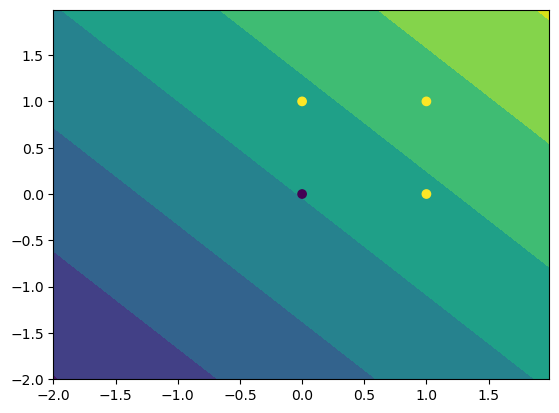

In [10]:
plt.contourf(xx, yy, z)
plt.scatter(X[:, 0], X[:, 1], c = y)

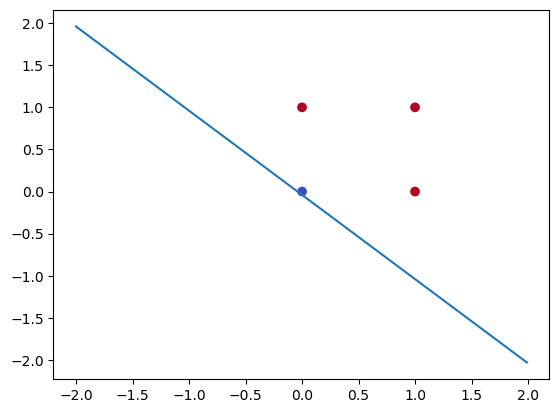

In [11]:
xx_1 = np.arange(X_min, X_max, .01)
z = - (pla.bias + pla.weight[-1] * xx_1) / pla.weight[1]

plt.plot(xx_1, z)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm")

[]

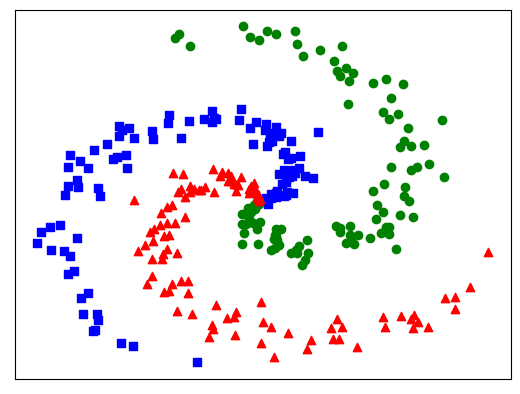

In [68]:
n_samples = 100
n_features = 2
n_class = 3
X = np.zeros((n_samples * n_class, n_features))

cur = 4

for i in range(n_class):
    # Radius 
    r = np.linspace(.0, .5, n_samples)
    t = np.linspace(i * cur, (i + 1) * cur, n_samples) + np.random.randn(n_samples) * 0.25
    idx = np.arange(i * n_samples, (i + 1) * n_samples)
    X[idx, :] = np.c_[r * np.cos(t), r * np.sin(t)]

    
for idx, (marker, color) in enumerate(zip(["s", "o", "^"], ["b", "g", "r"])):
    plt.scatter(X[idx * n_samples:(idx + 1)* n_samples, 0], X[idx * n_samples:(idx + 1) * n_samples, 1] ,marker = marker, c = color)
    
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])


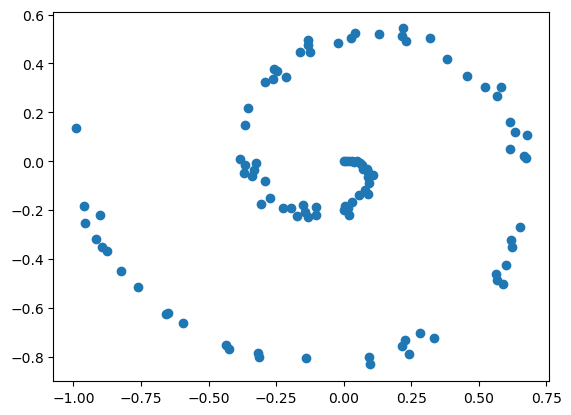

In [48]:
n_samples = 100
n_features = 2
r = np.linspace(.0, 1, n_samples)
t = np.linspace(2 * 10, 3 * 10, n_samples) + np.random.randn(n_samples) * 0.2
X = np.c_[r * np.sin(t), r * np.cos(t)]
plt.scatter(X[:, 0], X[:, 1])

In [27]:
r * np.sin(t)

array([ 0.        ,  0.0081359 ,  0.01983019,  0.02993378,  0.03753146,
        0.04820338,  0.05666273,  0.06606027,  0.06054917,  0.06984651,
        0.08932707,  0.09033714,  0.09569172,  0.10633999,  0.10578303,
        0.06029168,  0.10069346,  0.14927845,  0.12375787,  0.05577364,
        0.11869606,  0.08919708,  0.06102664,  0.13693718,  0.02525786,
        0.03885319,  0.17827975,  0.14331804,  0.04669153,  0.16088382,
        0.0523405 ,  0.09236733,  0.17018302,  0.1141894 ,  0.00116838,
        0.03541484,  0.05456602, -0.15448329, -0.0987431 , -0.14329068,
       -0.2434116 , -0.05100313,  0.06345247,  0.07759666, -0.11042174,
       -0.14450912, -0.18500241, -0.19761807, -0.31600974, -0.33829395,
       -0.38831478, -0.20989378, -0.38045968, -0.32523184, -0.41041238,
       -0.51954193, -0.42409383, -0.45886175, -0.57457028, -0.41884447,
       -0.58202397, -0.55000395, -0.56253056, -0.54110183, -0.62392092,
       -0.58608061, -0.63917663, -0.65901205, -0.66938565, -0.69